In [1]:
# You are a data scientist working for a healthcare company, and you have been tasked with creating a
# decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
# given a dataset (diabetes.csv) with the following variables:
# 1. Pregnancies: Number of times pregnant (integer)
# 2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
# 3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
# 4. SkinThickness: Triceps skin fold thickness (mm) (integer)
# 5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
# 6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
# 7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
# based on family history) (float)
# 8. Age: Age in years (integer)
# 9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

# Here’s the dataset link:

# Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
# variables. Here are the steps you can follow:

# https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

# Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
# understand the distribution and relationships between the variables.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
diabetes_df = pd.read_csv('diabetes.csv')

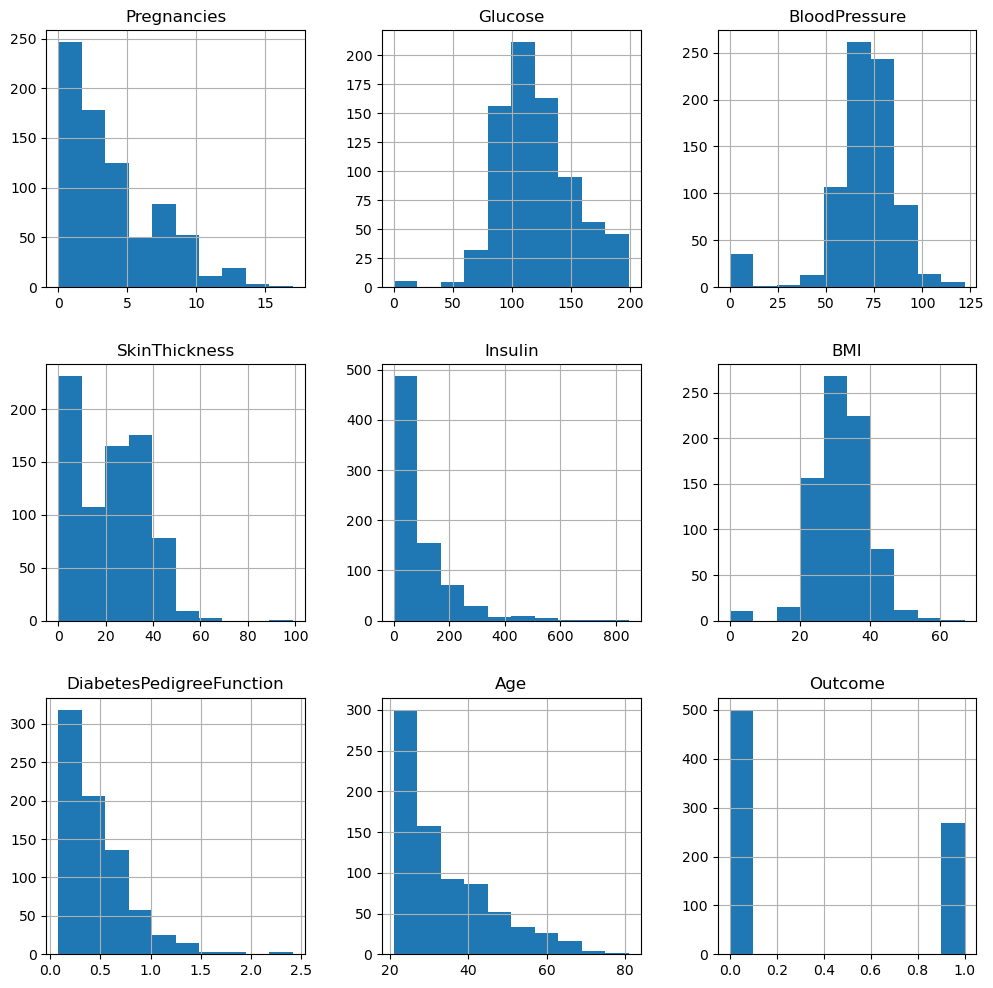

In [6]:
# Visualize the distribution of variables
diabetes_df.hist(figsize=(12, 12))
plt.show()

/tmp/ipykernel_1478/3914317415.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df['Glucose'], shade=True)
/tmp/ipykernel_1478/3914317415.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df['BloodPressure'], shade=True)
/tmp/ipykernel_1478/3914317415.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(diabetes_df['BMI'], shade=True)


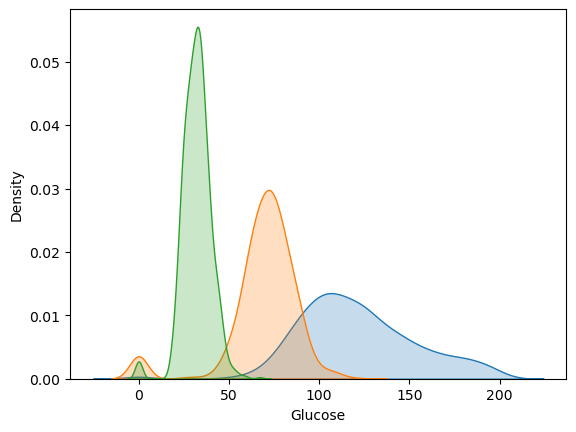

In [7]:
sns.kdeplot(diabetes_df['Glucose'], shade=True)
sns.kdeplot(diabetes_df['BloodPressure'], shade=True)
sns.kdeplot(diabetes_df['BMI'], shade=True)
plt.show()

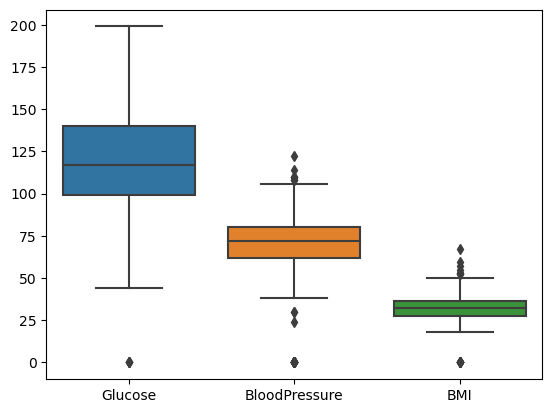

In [8]:
sns.boxplot(data=diabetes_df[['Glucose', 'BloodPressure', 'BMI']])
plt.show()

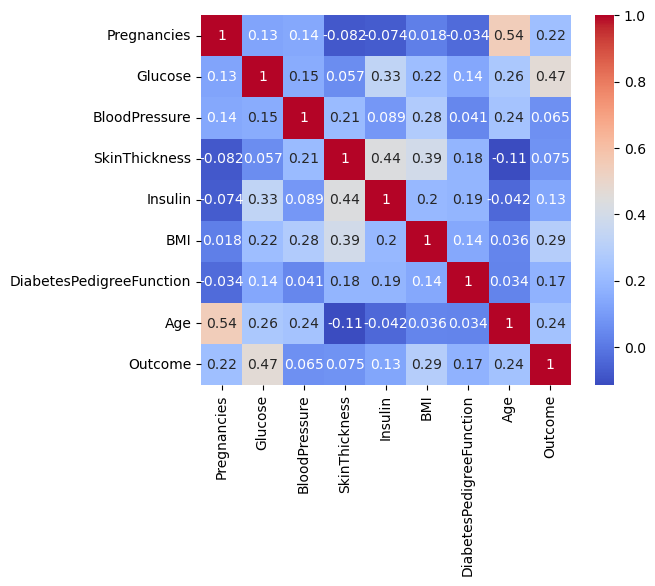

In [9]:
 # Examine relationships between variables
corr_matrix = diabetes_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.show()

In [10]:
# Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
# variables into dummy variables if necessary.

In [12]:
diabetes_df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [14]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

In [15]:
diabetes_df.dropna(inplace=True)

In [16]:
from scipy import stats

In [18]:
z_scores = stats.zscore(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])

In [19]:
threshold = 3

In [20]:
outliers = (abs(z_scores) > threshold).any(axis=1)

In [22]:
df_cleaned = diabetes_df[~outliers]

In [23]:
Q1 = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].quantile(0.25)
Q3 = diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']].quantile(0.75)
IQR = Q3 - Q1

In [25]:
outlier_mask = ~((diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] < (Q1 - 1.5 * IQR)) | (diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']] > (Q3 + 1.5 * IQR))).any(axis=1)

In [26]:
df_cleaned = diabetes_df[outlier_mask]

In [27]:
df_cleaned

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [30]:
# Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = df_cleaned.drop('Outcome', axis=1)  
y = df_cleaned['Outcome']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,     
    random_state=42     
)

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from scipy import stats

In [37]:
z_scores = stats.zscore(diabetes_df[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']])
threshold = 3
outliers = (abs(z_scores) > threshold).any(axis=1)
df_cleaned = diabetes_df[~outliers]

In [39]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,     
    random_state=42     
)

In [41]:
# Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
# cross-validation to optimize the hyperparameters and avoid overfitting.

In [42]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [43]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5]},
             scoring='accuracy')

In [47]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

In [48]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.77      0.76      0.76       151\n           1       0.56      0.56      0.56        80\n\n    accuracy                           0.69       231\n   macro avg       0.66      0.66      0.66       231\nweighted avg       0.69      0.69      0.69       231\n'

In [49]:
# Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
# precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [62]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [51]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [53]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

In [54]:
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:, 1]

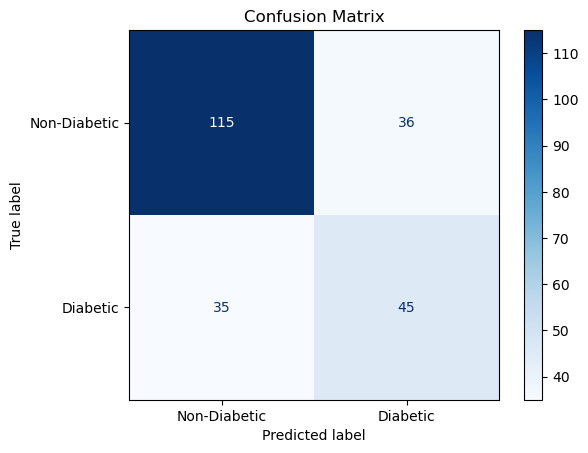

In [55]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Non-Diabetic', 'Diabetic']).plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

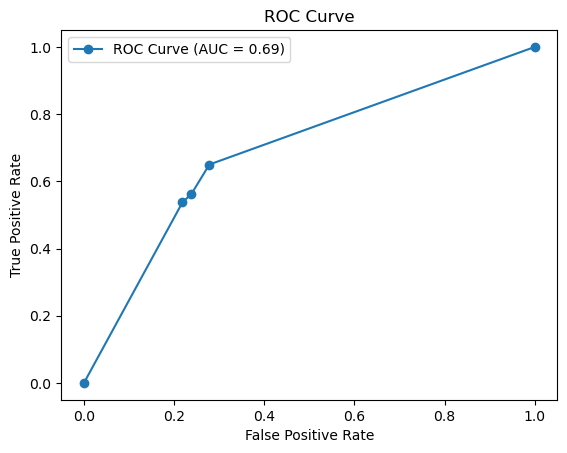

In [56]:
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, marker='o', label=f'ROC Curve (AUC = {roc_auc_score(y_test, y_prob):.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [57]:
# Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
# variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
# trends.

In [58]:
X = diabetes_df.drop('Outcome', axis=1)
y = diabetes_df['Outcome']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [60]:
dt = DecisionTreeClassifier(random_state=42)
param_grid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2]}
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

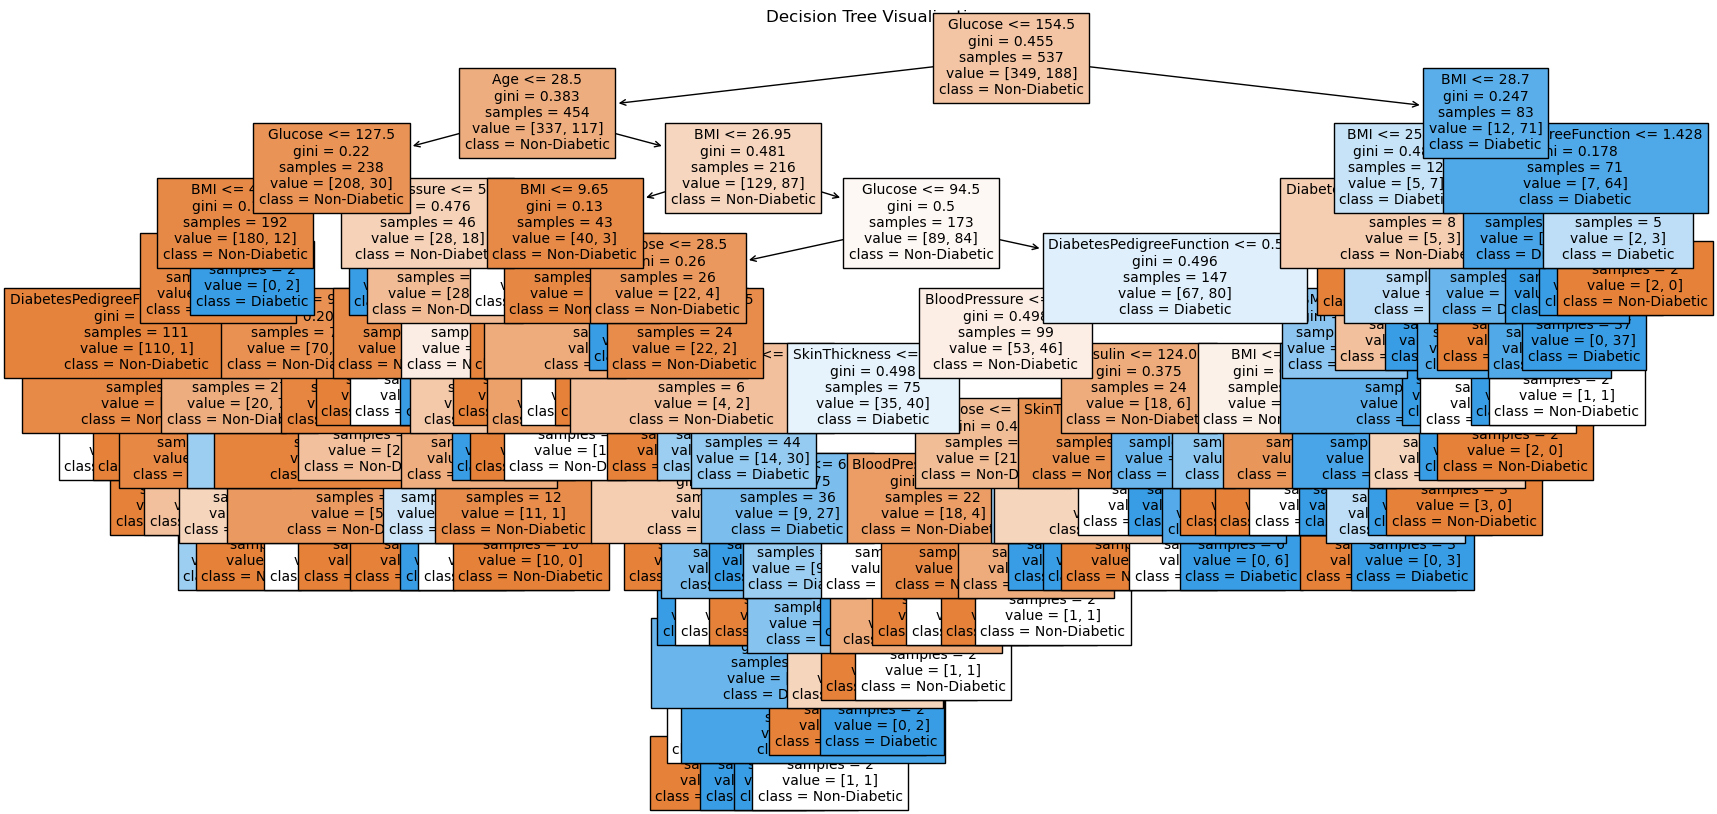

In [63]:
plt.figure(figsize=(20,10))
plot_tree(best_model, feature_names=X.columns, class_names=['Non-Diabetic', 'Diabetic'], filled=True, fontsize=10)
plt.title('Decision Tree Visualization')
plt.show()

In [64]:
# Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
# dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
# risks.

In [91]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [92]:
new_data = pd.read_csv('diabetes.csv')

In [93]:
actual_columns = diabetes_df.columns.tolist()

In [94]:
actual_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [95]:
expected_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                     'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

In [96]:
missing_columns = [col for col in expected_columns if col not in actual_columns]
if missing_columns:
    raise ValueError(f"Missing columns in the dataset: {missing_columns}")

In [97]:
X = diabetes_df[expected_columns]
y = diabetes_df['Outcome']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [99]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [100]:
new_data = pd.read_csv('diabetes.csv')


In [101]:
new_data_columns = new_data.columns.tolist()

In [103]:
y_new_pred = model.predict(new_data)

In [104]:
sample = X_test.iloc[0].copy()
sample = sample[expected_columns]

In [105]:
perturbations = [0.9, 1.0, 1.1]
for perturb in perturbations:
    modified_sample = sample.copy()
    modified_sample['Glucose'] *= perturb
    prediction = model.predict(modified_sample.values.reshape(1, -1))
    print(f"Prediction with 'Glucose' perturbed by {perturb * 100 - 100}%: {prediction}")

Prediction with 'Glucose' perturbed by -10.0%: [0]
Prediction with 'Glucose' perturbed by 0.0%: [0]
Prediction with 'Glucose' perturbed by 10.000000000000014%: [0]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
